<a href="https://colab.research.google.com/github/StephanieO-jpg/data-science-ninjazzz/blob/master/YouTubzzzz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mark

##**Introduction and question statement**

 **We have been provided with a sampled YouTube datatset that previews trending videos between 14TH November 2017 and 14th June 2018.This will be an analysis on the trending youtube videos and formulating hypothesis's on what exactly makes a video trending.**



# Steph

## **Previewing and cleaning the dataset**

In [0]:
# importing the libraries needed

import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
import json as js

# Setting the graph styles to Seaborn one
sns.set()

# Import the KMeans module to allow for performing of the k-means clustering with sklearn
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder

In [0]:
pip install pandas-profiling

In [0]:
# Loading and Reading the data from the CSV file and create the dataframe to be used
states=pd.read_csv('USvideos.csv', encoding='utf-8')

# Preview random data within the dataset 
states.take(np.random.permutation(len(states))[:10]) 

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
14714,uGwcNjWrgaU,18.28.01,Why Are Fat People a Joke?,LoeyLane,24,2018-01-23T14:00:04.000Z,"loeylane|""loey lane""|""loey""|""bug""|""lane""|""loey...",279580,0,0,338,https://i.ytimg.com/vi/uGwcNjWrgaU/default.jpg,False,True,False,OPEN ME FOR ALL OF THE THINGS!\n\nWatch Meghan...
21202,YskVs5VyqHk,18.02.03,Splitting Bullets in 4K,The Slow Mo Guys,22,2018-02-27T17:00:06.000Z,"Super Slow Show|""Slow Motion""|""4K""|""Explosion""...",2956442,94910,1284,4317,https://i.ytimg.com/vi/YskVs5VyqHk/default.jpg,False,False,False,It's the battle of bullet vs. blade as the guy...
3899,LeWtF5y9-6Q,17.03.12,Old Movies Used To Just Shoot Real Bullets At ...,Cracked,23,2017-11-28T17:00:03.000Z,"Cracked|""cracked.com""|""sketch""|""comedy""|""funny...",434727,10366,313,814,https://i.ytimg.com/vi/LeWtF5y9-6Q/default.jpg,False,False,False,The way movie gunfights used to go down proves...
9765,zT4DJKkN_Do,18.01.01,Teeny Weeny Challenge #3 How Small Can I Bake ...,How To Cook That,26,2017-12-22T08:30:39.000Z,"teeny weeny challenge|""youtube challenge""|""tin...",253423,7626,182,1772,https://i.ytimg.com/vi/zT4DJKkN_Do/default.jpg,False,False,False,Teeny Weeny Challenge #3 how small can I bake ...
3695,-v-_Z11T5L4,17.02.12,A social worker has the worst day of his life....,Omeleto,1,2017-11-29T08:57:21.000Z,"ironied|""omeleto shorts""|""omeleto""|""homeless m...",68934,2078,57,138,https://i.ytimg.com/vi/-v-_Z11T5L4/default.jpg,False,False,False,He learns a life lesson at 5:17...\n😃 SUBSCRIB...
3644,REt-3P5h4Lo,17.02.12,"Never Have I Ever with Kylie, Jordyn and Victoria",Kylie Cosmetics,22,2017-11-29T23:50:14.000Z,"Kylie Jenner|""Jordyn Woods""|""Kylie""|""Kylie Cos...",1511919,58914,2497,2507,https://i.ytimg.com/vi/REt-3P5h4Lo/default.jpg,False,False,False,"Kylie Jenner, Jordyn Woods and Victoria Villar..."
11923,uI9G_fZRLWM,18.14.01,Best Of 2017 KKandbabyJ,KKandbabyJ,22,2018-01-11T01:10:15.000Z,"kkandbabyj|""khoa""|""keren""|""jackson""|""Landon""|""...",296719,23385,151,8361,https://i.ytimg.com/vi/uI9G_fZRLWM/default.jpg,False,False,False,Thank you all so much for such a wonderful yea...
40909,au8QGTiPhEw,18.14.06,Azealia Banks - Anna Wintour,AzealiaBanksVEVO,10,2018-05-24T15:59:22.000Z,"Azealia|""Banks""|""Anna""|""Wintour""|""eOne""|""Music...",2611836,90500,12360,15746,https://i.ytimg.com/vi/au8QGTiPhEw/default.jpg,False,False,False,Azealia Banks Anna WintoureOne MusicAvailable ...
13276,V4dqF7UOspg,18.21.01,Women at Yale Use 'Whisper Networks' To Protec...,Business Insider,25,2018-01-19T17:56:22.000Z,"Business Insider|""Yale""|""Fraternity""|""Whisper ...",7829,127,99,78,https://i.ytimg.com/vi/V4dqF7UOspg/default.jpg,False,False,False,No one seems happy with the way sexual miscond...
31236,ffxKSjUwKdU,18.27.04,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",56538628,2350865,85885,200322,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...


Above is a preview of 10 random data within the US dataset

Above is a preview of 10 random data within the Indian dataset

In [0]:
# Knowing more about the datasets by accessing its information
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


The above cells display information on the datatypes of each dataset as well as the entries made and the range index

## **Cleaning the dataset** 

Once the previewing is done we go ahead to find and deal with outliers, anomalies, and missing data within the dataset so as to make sure the data is clean before proceeding to its analysis. In addition to this we check on null values, split time into hour of the day as well as teh date time column, we drop irrelevant,separate the day of the week 

In [0]:
# Checking the dataset for any null values

states.isnull().any()

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description                True
dtype: bool

It has been noted that in both datasets there are null values in the description columns. Because the description column is one of the columns being dropped, there will be no need to drop the null values found within the column

In [0]:
# drop irrelevant columns
states.drop(['thumbnail_link','tags','title','video_id','comments_disabled','ratings_disabled','video_error_or_removed','description','video_id','title'],axis=1,inplace=True)
states.head()

,trending_date,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
0,17.14.11,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954
1,17.14.11,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703
2,17.14.11,Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181
3,17.14.11,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146
4,17.14.11,nigahiga,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518


Because we will densely be working with the numerical data for this analysis the data that is in text form is irrelevant and therefore we dropped the columns whose datatype was string/object

In [0]:
# Look for any duplicate in the dataset
states_non_duplicates=states.drop_duplicates
states_non_duplicates

<bound method DataFrame.drop_duplicates of       trending_date             channel_title  ...  dislikes comment_count
0          17.14.11              CaseyNeistat  ...      2966         15954
1          17.14.11           LastWeekTonight  ...      6146         12703
2          17.14.11              Rudy Mancuso  ...      5339          8181
3          17.14.11     Good Mythical Morning  ...       666          2146
4          17.14.11                  nigahiga  ...      1989         17518
...             ...                       ...  ...       ...           ...
40944      18.14.06             AaronsAnimals  ...      1385          2657
40945      18.14.06                  zefrank1  ...       382          3936
40946      18.14.06                Brad Mondo  ...      1032          3992
40947      18.14.06  How It Should Have Ended  ...      2846         13088
40948      18.14.06              Call of Duty  ...    212976        144795

[40949 rows x 8 columns]>

Datetime object for States

In [0]:
# Create a datetime object from the year, month and day column as well as the hour and minute column
# states['timestamp']=pd.to_datetime(states[['day','month','year','hour','minute']])

states.publish_time = states.publish_time.apply(pd.to_datetime)
states['Day'] = [d.date() for d in states['publish_time']]
states['Time'] = [d.time() for d in states['publish_time']]
states.take(np.random.permutation(len(states))[:10])

,trending_date,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,Day,Time
22926,18.10.03,Late Night with Seth Meyers,23,2018-02-28 11:00:01+00:00,127618,1328,120,202,2018-02-28,11:00:01
33866,18.10.05,SnowPatrolVEVO,10,2018-05-02 16:30:00+00:00,677983,20266,305,829,2018-05-02,16:30:00
30527,18.23.04,UFC ON FOX,22,2018-04-08 09:08:05+00:00,865509,3495,434,1089,2018-04-08,09:08:05
19806,18.23.02,The View,24,2018-02-21 16:15:10+00:00,195473,1958,1232,1693,2018-02-21,16:15:10
2206,17.25.11,Adult Swim,24,2017-11-22 15:00:17+00:00,4628861,129026,4970,16478,2017-11-22,15:00:17
26378,18.28.03,jypentertainment,10,2018-03-26 08:59:44+00:00,9129695,332748,4708,55943,2018-03-26,08:59:44
40232,18.11.06,Clean Bandit,10,2018-05-31 09:00:13+00:00,15362601,381951,8481,12219,2018-05-31,09:00:13
38575,18.03.06,5SOSVEVO,10,2018-05-31 23:00:00+00:00,322352,43578,202,3545,2018-05-31,23:00:00
11869,18.14.01,Hope For Paws - Official Rescue Channel,15,2018-01-10 22:06:06+00:00,1004687,33531,542,2696,2018-01-10,22:06:06
31497,18.28.04,Matt Bentkowski,17,2018-04-16 20:37:56+00:00,3410209,27995,1646,2357,2018-04-16,20:37:56


In [0]:
states[['h','m','s']] = states['Time'].astype(str).str.split(':', expand=True).astype(int)
states.take(np.random.permutation(len(states))[:10])

,trending_date,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,Day,Time,h,m,s
3886,17.03.12,Beyond The Trailer,24,2017-11-29 18:53:21+00:00,126565,2365,536,1152,2017-11-29,18:53:21,18,53,21
12477,18.17.01,Kandee Johnson,26,2018-01-13 20:22:31+00:00,664561,13956,901,1291,2018-01-13,20:22:31,20,22,31
22553,18.08.03,Natalies Outlet,24,2018-02-24 21:06:12+00:00,1824255,168693,3072,37289,2018-02-24,21:06:12,21,6,12
40099,18.10.06,CAguileraVEVO,10,2018-05-23 17:00:01+00:00,15519728,506022,14001,25866,2018-05-23,17:00:01,17,0,1
32399,18.03.05,Jaiden Animations,1,2018-04-29 18:35:11+00:00,2531624,215569,652,44073,2018-04-29,18:35:11,18,35,11
6391,17.15.12,People are Awesome,24,2017-12-08 13:01:46+00:00,986554,15187,199,504,2017-12-08,13:01:46,13,1,46
19118,18.19.02,Channon Rose Vlogs,24,2018-02-12 17:41:00+00:00,110470,7366,69,1247,2018-02-12,17:41:00,17,41,0
545,17.16.11,WLKY News Louisville,25,2017-11-13 16:14:00+00:00,6743,11,35,16,2017-11-13,16:14:00,16,14,0
29687,18.19.04,AnimalWised,15,2018-04-07 21:00:00+00:00,686767,21064,285,2133,2018-04-07,21:00:00,21,0,0
38566,18.03.06,AsapSCIENCE,28,2018-05-31 16:00:06+00:00,665823,18220,903,1993,2018-05-31,16:00:06,16,0,6


In [0]:
states.head()

,trending_date,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,Day,Time,h,m,s
0,17.14.11,CaseyNeistat,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954,2017-11-13,17:13:01,17,13,1
1,17.14.11,LastWeekTonight,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703,2017-11-13,07:30:00,7,30,0
2,17.14.11,Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181,2017-11-12,19:05:24,19,5,24
3,17.14.11,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146,2017-11-13,11:00:04,11,0,4
4,17.14.11,nigahiga,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518,2017-11-12,18:01:41,18,1,41


In [0]:
states['weekday'] = states['Day'].apply (lambda x:x.weekday() )

In [0]:
states.head()

,trending_date,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,Day,Time,h,m,s,weekday
0,17.14.11,CaseyNeistat,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954,2017-11-13,17:13:01,17,13,1,0
1,17.14.11,LastWeekTonight,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703,2017-11-13,07:30:00,7,30,0,0
2,17.14.11,Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181,2017-11-12,19:05:24,19,5,24,6
3,17.14.11,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146,2017-11-13,11:00:04,11,0,4,0
4,17.14.11,nigahiga,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518,2017-11-12,18:01:41,18,1,41,6


In [0]:
dictionary = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
states['weekday'] = states['weekday'].map(dictionary)

In [0]:
states.head()

,trending_date,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,Day,Time,h,m,s,weekday
0,17.14.11,CaseyNeistat,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954,2017-11-13,17:13:01,17,13,1,Monday
1,17.14.11,LastWeekTonight,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703,2017-11-13,07:30:00,7,30,0,Monday
2,17.14.11,Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181,2017-11-12,19:05:24,19,5,24,Sunday
3,17.14.11,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146,2017-11-13,11:00:04,11,0,4,Monday
4,17.14.11,nigahiga,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518,2017-11-12,18:01:41,18,1,41,Sunday


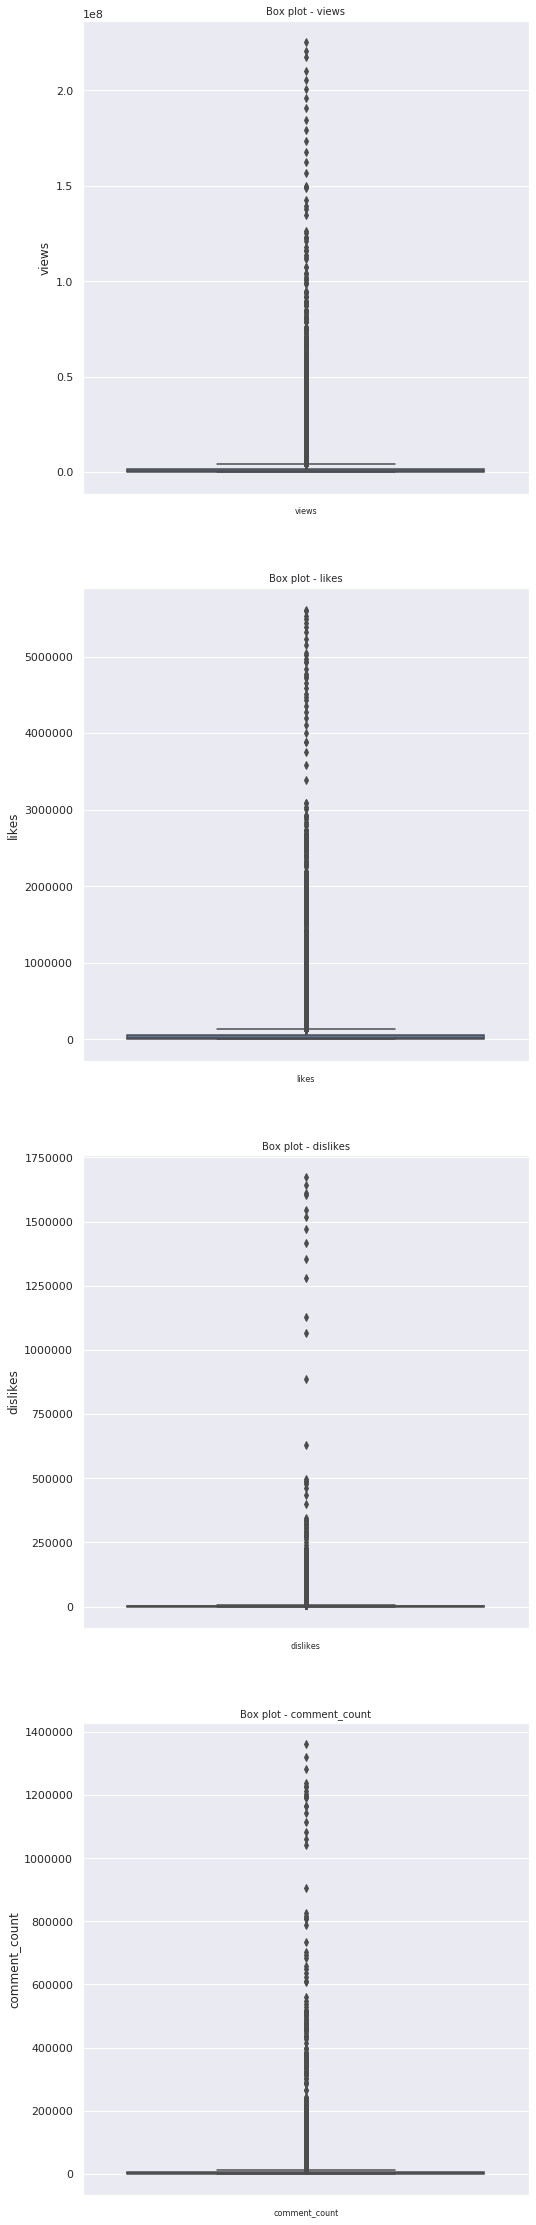

In [0]:
# findining outliers in usa
columns=['views','likes','dislikes','comment_count']
fig, ax = plt.subplots(len(columns), figsize=(8,40))
for i, values in enumerate(columns):

    sns.boxplot(y=states[values], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(values), fontsize=10)
    ax[i].set_xlabel(values, fontsize=8)
plt.show()

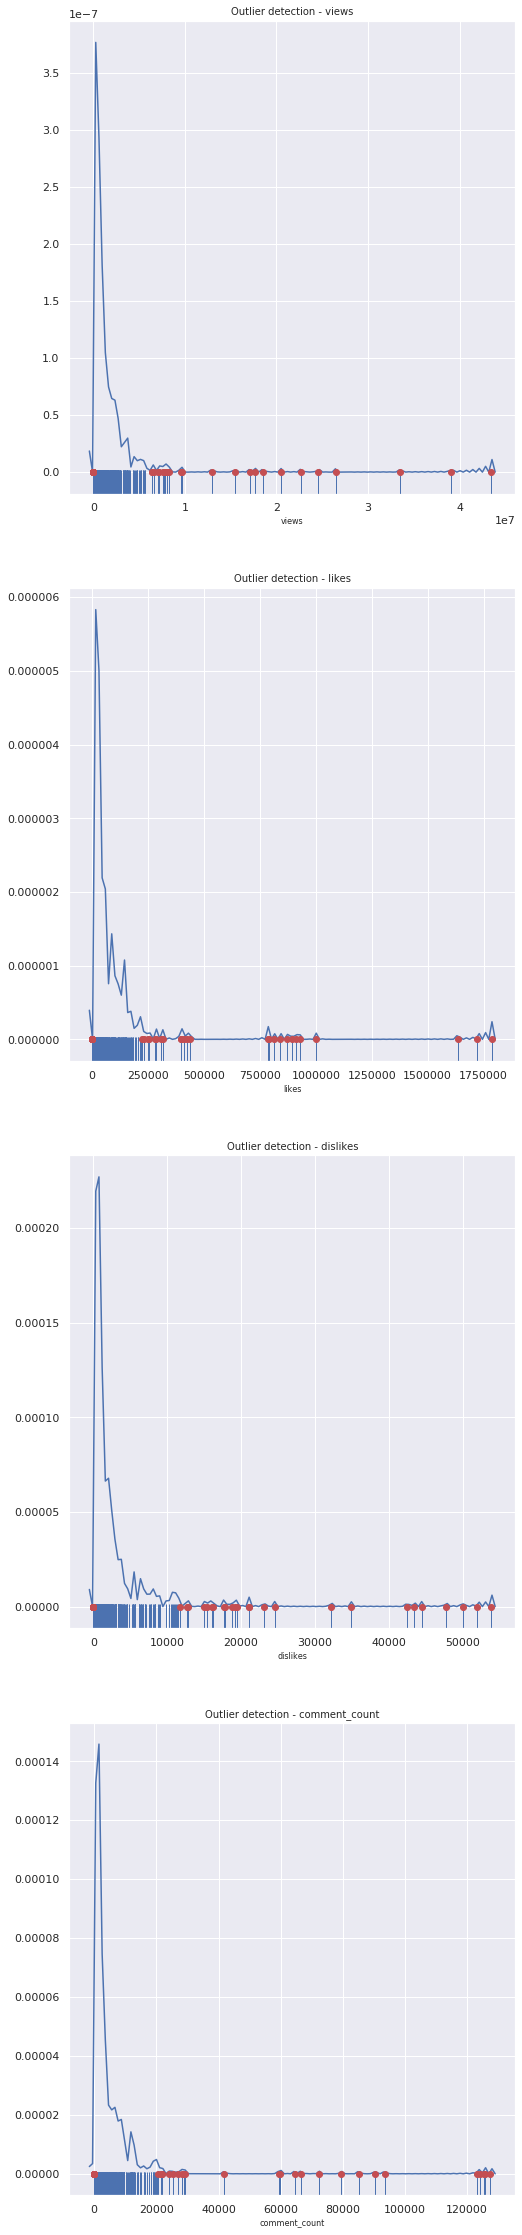

In [0]:
# dealing with outliers
def percentile_based_outlier(states, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(states, [diff, 100 - diff])
    return (states < minval) | (states> maxval)

col_names = ['views','likes','dislikes','comment_count']

fig, ax = plt.subplots(len(columns), figsize=(8,40))

for i, values in enumerate(columns):
    x = states[values][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(values), fontsize=10)
    ax[i].set_xlabel(values, fontsize=8)

plt.show()

In [0]:
states[['views','likes','dislikes','comment_count']] = states[['views','likes','dislikes','comment_count']].astype(float)

In [0]:
statesexp=states[['views','likes','dislikes','comment_count', 'category_id', 'weekday','Day', 'Time', 'h', 'm', 's']]
statesexp.head()

,views,likes,dislikes,comment_count,category_id,weekday,Day,Time,h,m,s
0,748374.0,57527.0,2966.0,15954.0,22,Monday,2017-11-13,17:13:01,17,13,1
1,2418783.0,97185.0,6146.0,12703.0,24,Monday,2017-11-13,07:30:00,7,30,0
2,3191434.0,146033.0,5339.0,8181.0,23,Sunday,2017-11-12,19:05:24,19,5,24
3,343168.0,10172.0,666.0,2146.0,24,Monday,2017-11-13,11:00:04,11,0,4
4,2095731.0,132235.0,1989.0,17518.0,24,Sunday,2017-11-12,18:01:41,18,1,41


In [0]:
statesexp.duplicated().sum()
statesexp.drop_duplicates()

,views,likes,dislikes,comment_count,category_id,weekday,Day,Time,h,m,s
0,748374.0,57527.0,2966.0,15954.0,22,Monday,2017-11-13,17:13:01,17,13,1
1,2418783.0,97185.0,6146.0,12703.0,24,Monday,2017-11-13,07:30:00,7,30,0
2,3191434.0,146033.0,5339.0,8181.0,23,Sunday,2017-11-12,19:05:24,19,5,24
3,343168.0,10172.0,666.0,2146.0,24,Monday,2017-11-13,11:00:04,11,0,4
4,2095731.0,132235.0,1989.0,17518.0,24,Sunday,2017-11-12,18:01:41,18,1,41
...,...,...,...,...,...,...,...,...,...,...,...
40944,1685609.0,38160.0,1385.0,2657.0,15,Friday,2018-05-18,13:00:04,13,0,4
40945,1064798.0,60008.0,382.0,3936.0,22,Friday,2018-05-18,01:00:06,1,0,6
40946,1066451.0,48068.0,1032.0,3992.0,24,Friday,2018-05-18,17:34:22,17,34,22
40947,5660813.0,192957.0,2846.0,13088.0,1,Thursday,2018-05-17,17:00:04,17,0,4


In [0]:
q1=statesexp.quantile(0.25)
q3=statesexp.quantile(0.75)
iqr=q3-q1
statesexp = statesexp[~((statesexp < (q1 - 1.5 * iqr)) | (statesexp> (q3 + 1.5 * iqr))).any(axis=1)]

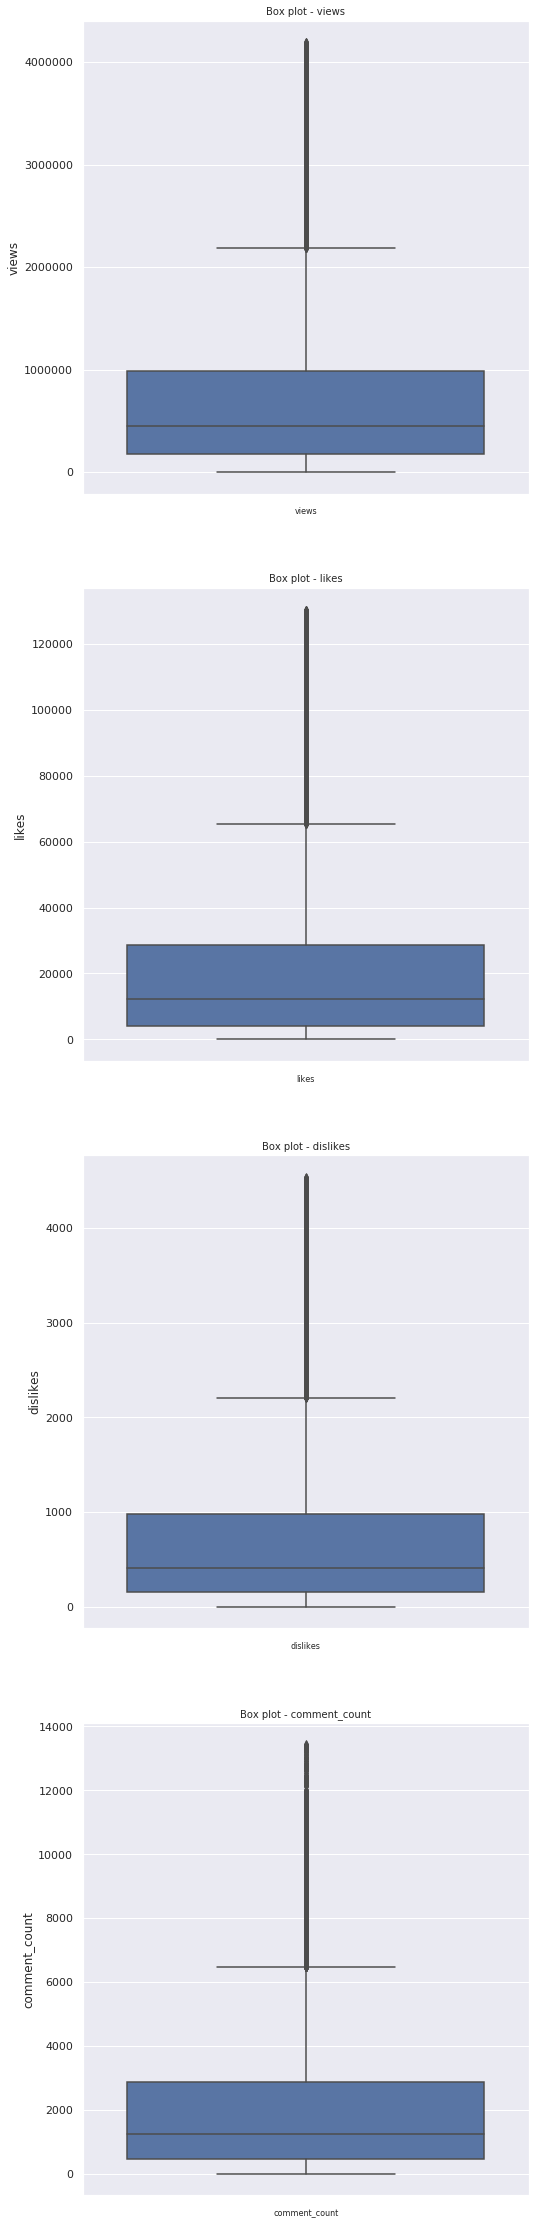

In [0]:
# checking if outliers have been removed
columns=['views','likes','dislikes','comment_count']
fig, ax = plt.subplots(len(columns), figsize=(8,40))
for i, values in enumerate(columns):
    sns.boxplot(y=statesexp[values], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(values), fontsize=10)
    ax[i].set_xlabel(values, fontsize=8)
plt.show()

# Machocho

## **EXPLORATORY DATA ANALYSIS**


1.   Univariate analysis: measures of central tendency and dispersion. 
2.   Bivariate analysis.




### UNIVARIATE ANALYSIS

Measueres of central tendencies and dispersion

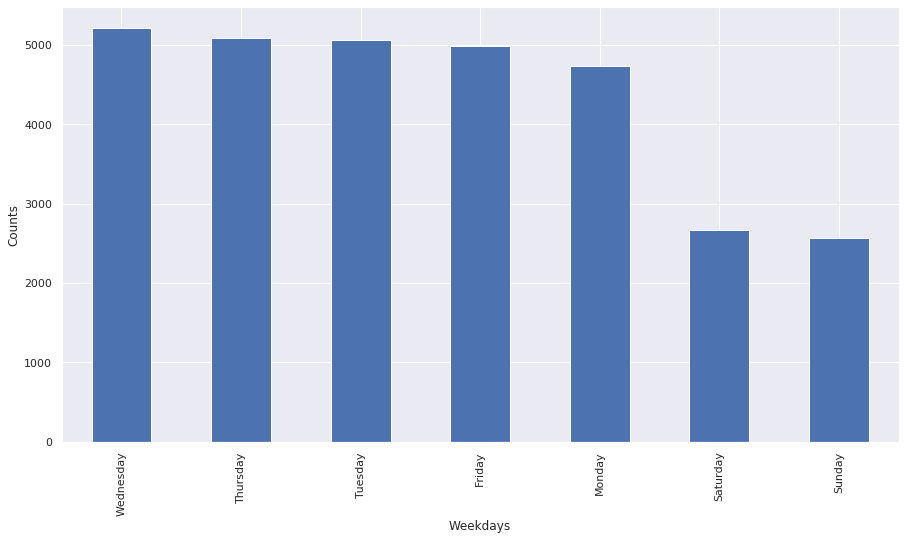

In [0]:
# plot showing the most popular days trending videos are published. 
plt.figure(figsize = (15,8))
plt.xlabel('Weekdays')
plt.ylabel('Counts')
statesexp.weekday.value_counts().plot.bar()

# The most popular time to post a video is near the weekend


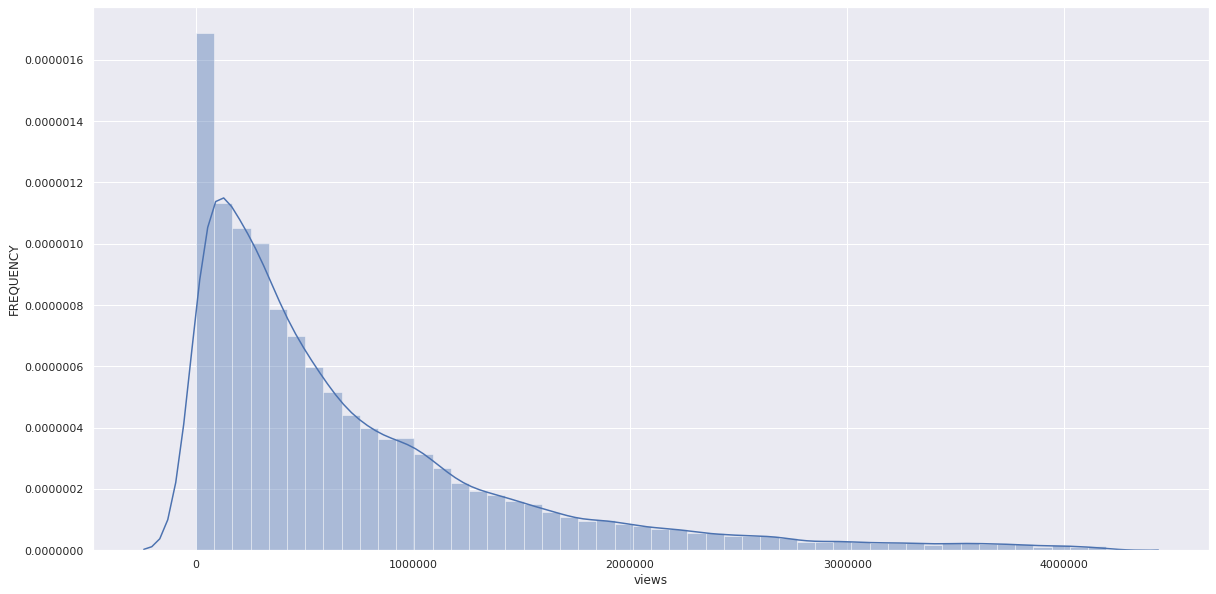

In [0]:
# histogram of views in the United states
plt.figure(figsize=(20,10)))
plt.ylabel('FREQUENCY')
sns.distplot(statesexp.views)



In [0]:
# to get the descriptive statistics of the data for states
statesexp.describe()

,views,likes,dislikes,comment_count,category_id,h,m,s
count,3.029900e+04,30299.000000,30299.000000,30299.000000,30299.000000,30299.000000,30299.000000,30299.000000
mean,7.131787e+05,21199.136803,721.419090,2085.444767,21.850523,13.637348,18.641638,20.782798
std,7.599326e+05,24991.957625,831.997591,2310.283363,5.411760,6.480530,19.533277,18.908519
min,5.490000e+02,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,1.802110e+05,3977.000000,152.000000,474.000000,22.000000,10.000000,0.000000,3.000000
50%,4.532640e+05,12133.000000,407.000000,1252.000000,24.000000,15.000000,13.000000,16.000000
75%,9.831675e+05,28554.500000,974.000000,2868.000000,25.000000,18.000000,33.000000,37.000000
max,4.192940e+06,130373.000000,4542.000000,13448.000000,29.000000,23.000000,59.000000,59.000000


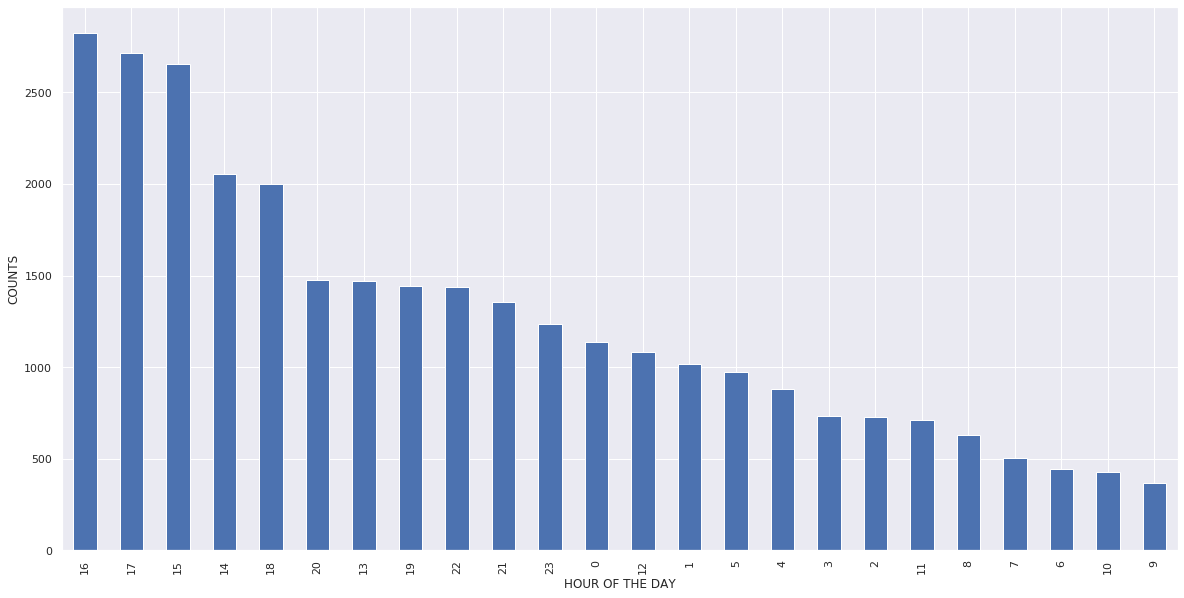

In [0]:
#hourly frequency upload times for videos in the United states in 24 hour format
plt.figure(figsize=(20,10))
plt.xlabel('HOUR OF THE DAY')
plt.ylabel('COUNTS')
statesexp.h.value_counts().plot.bar()

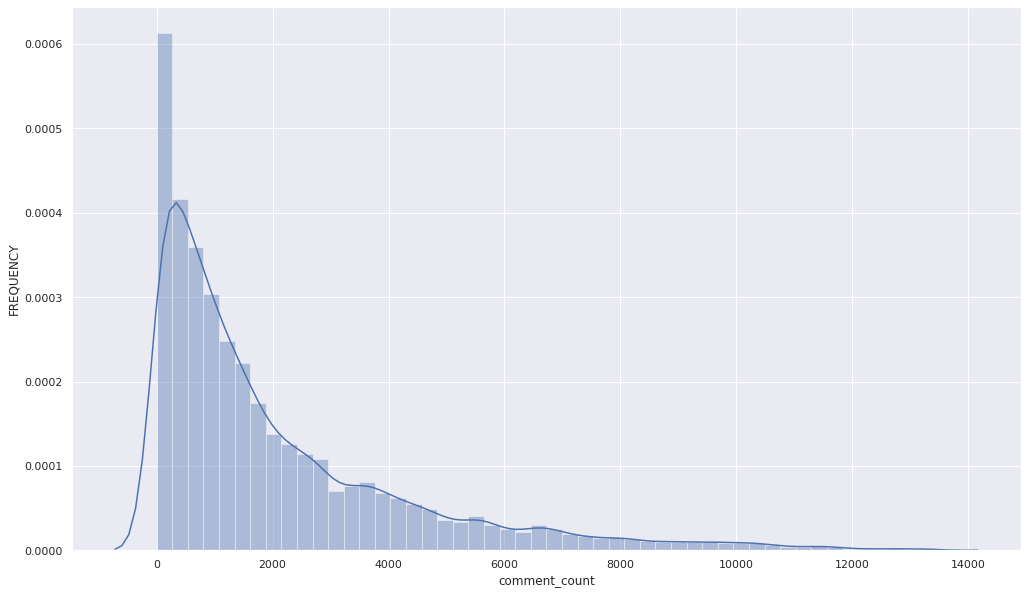

In [0]:
#histogram of the video comment counts in the US
plt.figure(figsize=(17,10))
plt.ylabel('FREQUENCY')
sns.distplot(statesexp.comment_count)

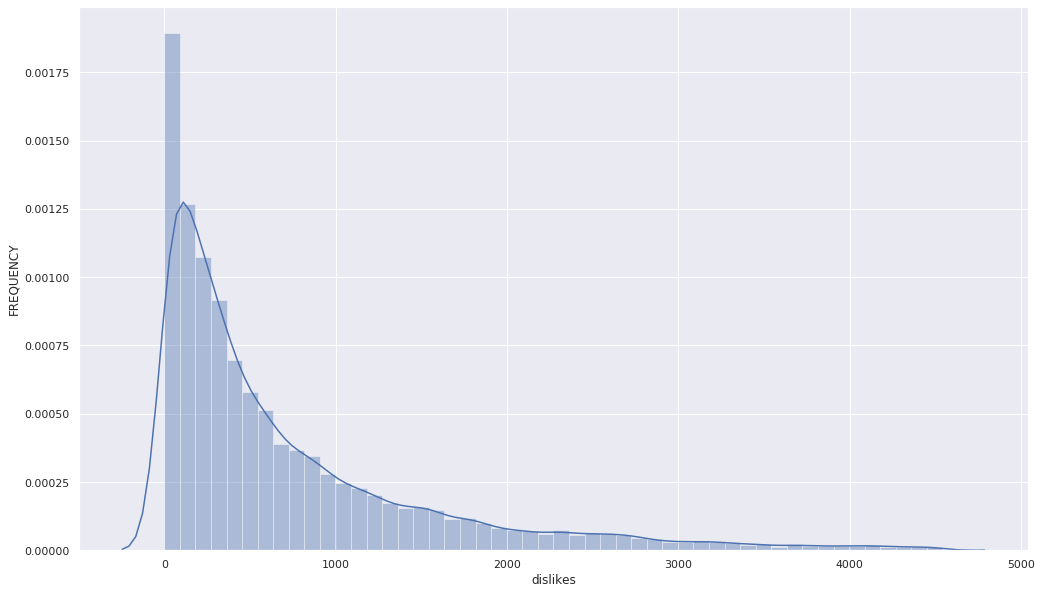

In [0]:
#histogram of video dislikes in the US
plt.figure(figsize=(17,10))
plt.ylabel('FREQUENCY')
sns.distplot(statesexp.dislikes)

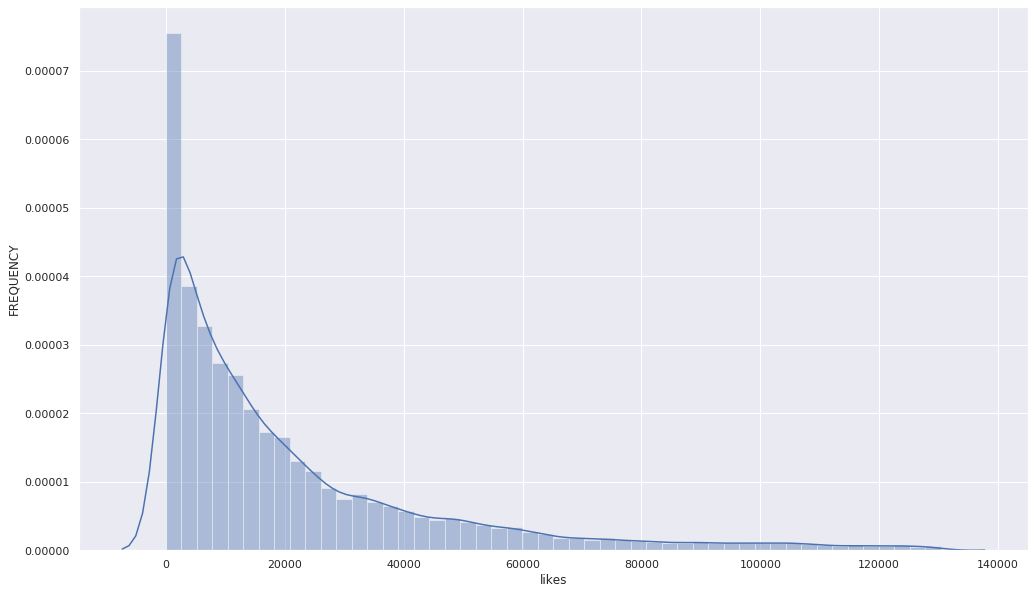

In [0]:
#histogram of video likes in the US
plt.figure(figsize=(17,10))
plt.ylabel('FREQUENCY')
sns.distplot(statesexp.likes)

In [0]:
print('Average views of a trending video in the USA is '+str(statesexp.views.mean()))


Average views of a trending video in the USA is 713178.6768870259


In [0]:
#comparing the median number of views between the US and India
print('Median views of a trending video in the USA is '+str(statesexp.views.median()))

Median views of a trending video in the USA is 453264.0


In [0]:
#comparing the average no likes between the US and india
print('Average likes of a trending video in the USA are '+str(statesexp.likes.mean()))

Average likes of a trending video in the USA are 21199.136803194826


###**BIVARIATE ANALYSIS**

This will entail scatterplots and linear correlation. Because the variaibles are not normally distributes, the Spearman Rank correlation will be employed. 

In [0]:
# import the necessary libraries
from scipy.stats import spearmanr
import numpy as np


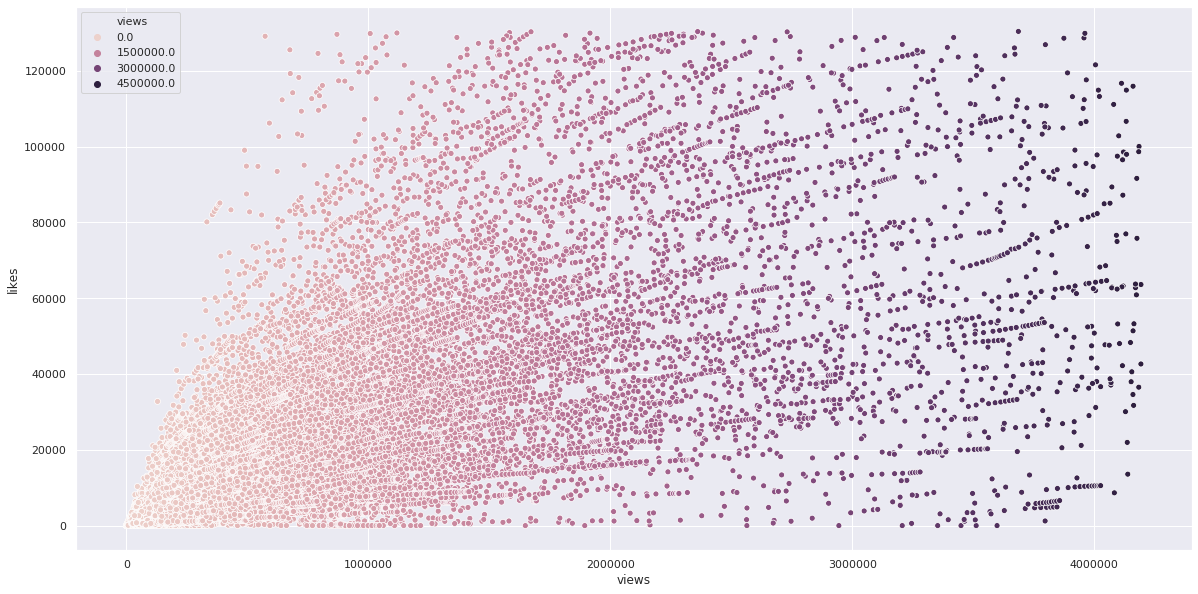

In [0]:
#scatterplot of views against number of likes United States
plt.figure(figsize=(20,10))
sns.scatterplot(statesexp.views,statesexp.likes,hue=statesexp.views)

In [0]:
statesexp.views.corr(statesexp.likes, method = "spearman")

0.8037036417555088

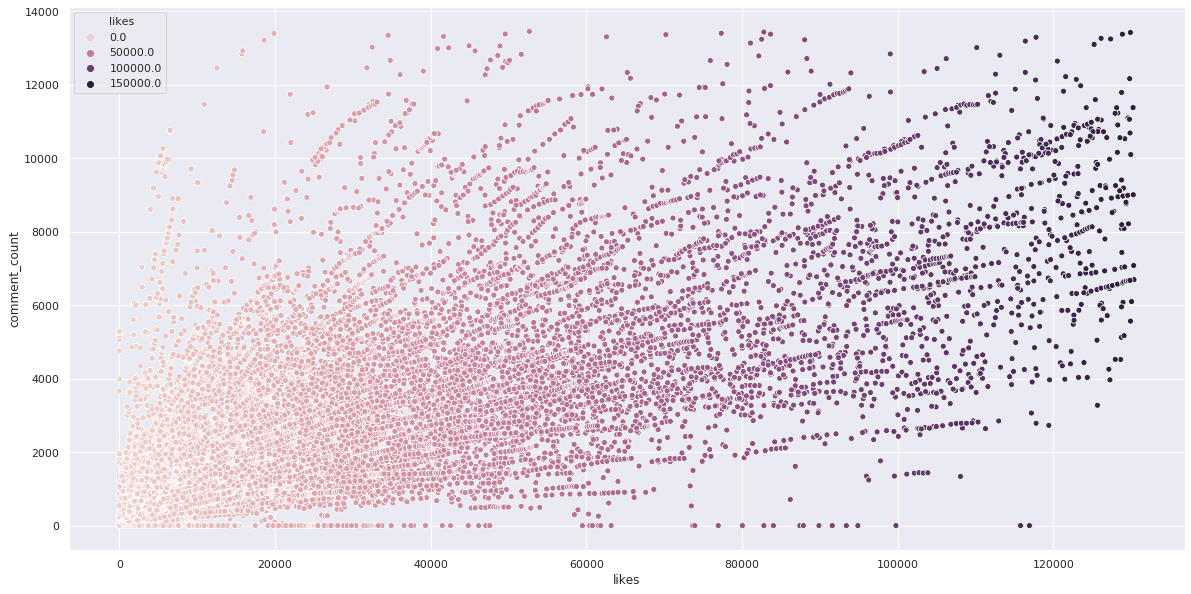

In [0]:
#scatterplot of likes against comment counts United states
plt.figure(figsize=(20,10))
sns.scatterplot(statesexp.likes,statesexp.comment_count,hue=statesexp.likes)

In [0]:
statesexp.comment_count.corr(statesexp.likes, method = "spearman")

0.8216633977500124

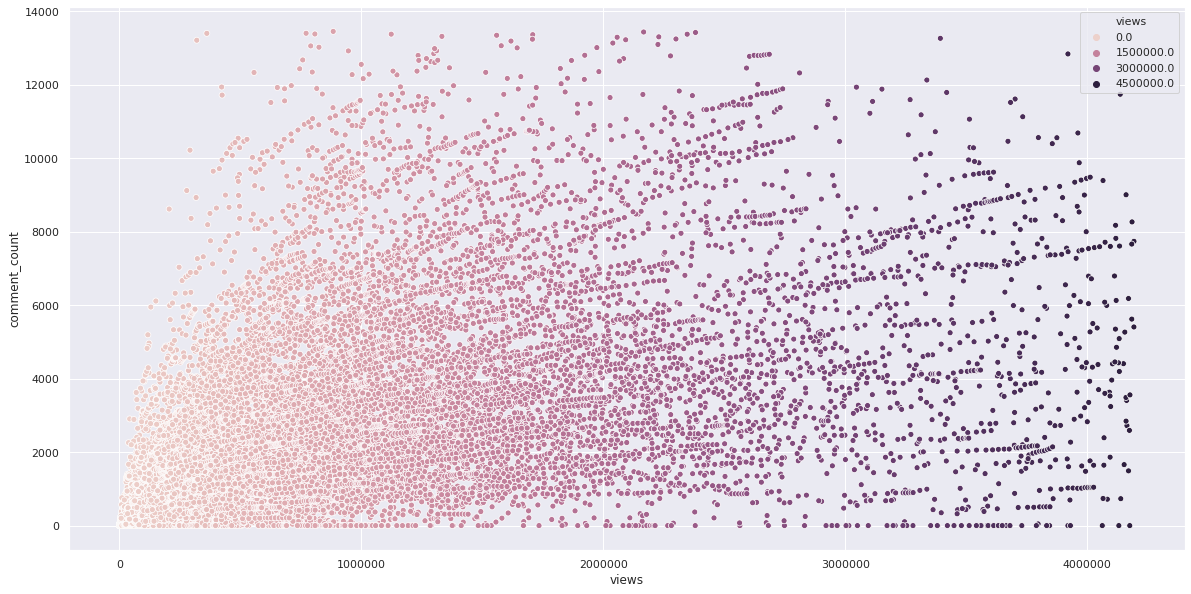

In [0]:
  #scatter plot of views against comment counts United States
plt.figure(figsize=(20,10))
sns.scatterplot(statesexp.views,statesexp.comment_count,hue=statesexp.views)

In [0]:
statesexp.views.corr(statesexp.comment_count, method = "spearman")

0.7411763524154855

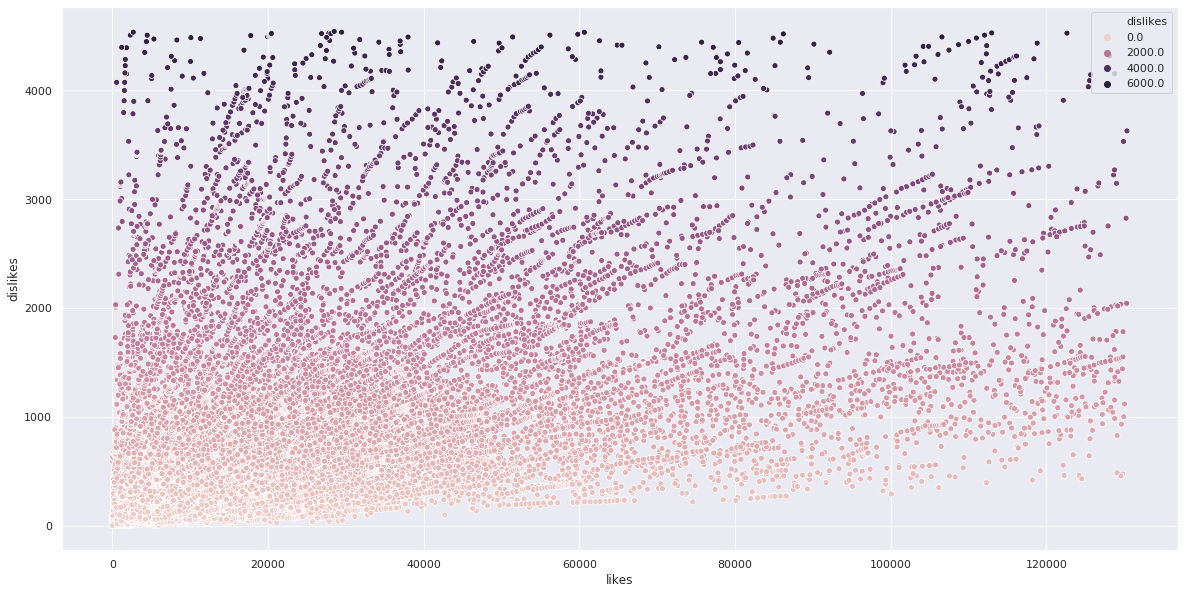

In [0]:
#scatter of likes vs dislikes United states
plt.figure(figsize=(20,10))
sns.scatterplot(statesexp.likes,statesexp.dislikes,hue=statesexp.dislikes)

In [0]:
statesexp.dislikes.corr(statesexp.likes, method = "spearman")

0.7062543996915978

In [0]:
statesexp.likes.std()

24991.957624951796

In [0]:
statesexp.iloc[45]

views                162597
likes                  5734
dislikes                106
comment_count           525
category_id              17
weekday            Saturday
Day              2017-11-11
Time               20:00:02
h                        20
m                         0
s                         2
Name: 56, dtype: object

# Wambugu and Mark

## **Hypothesis Testing**

### statement of hypothesis

The claim we are trying to test is whether videos released on weekends tend to garner more views as opposed to videos released during a normal weekday.

Null hypothesis: There is no difference in the average number of views between 
                 videos released on weekdays vs videos released on weekends.


Alternate hypothesis: Videos released on weekends tend to have more views on   
                                  average vs videos released on weekdays.

Definition of the weekend includes Friday,Saturday and Sunday.

The level of significance will be 0.01

We will use a z-test to conduct the test 

The test will be a one tailed test

In [0]:
statesexp.weekday.unique()

array(['Monday', 'Sunday', 'Friday', 'Saturday', 'Tuesday', 'Thursday',
       'Wednesday'], dtype=object)

In [0]:
#create a new dataframe of the weekend days
weekends = statesexp[(statesexp.weekday == 'Sunday') | (statesexp.weekday == 'Saturday') | (statesexp.weekday == 'Friday')]
weekends.shape

(10217, 11)

In [0]:
#create a new dataframe of the weekdays
weekdays = statesexp[(statesexp.weekday == 'Monday') | (statesexp.weekday == 'Tuesday') | (statesexp.weekday == 'Thursday') | (statesexp.weekday == 'Wednesday')]
weekdays.shape

(20082, 11)

In [0]:
#taking a sample of the weekends dataframe,sample size of 100
weekend_sample = weekends.sample(n=100)
weekend_sample

,views,likes,dislikes,comment_count,category_id,weekday,Day,Time,h,m,s
9332,254037.0,7936.0,220.0,304.0,10,Friday,2017-12-22,05:00:04,5,0,4
2186,367973.0,6356.0,761.0,527.0,26,Friday,2017-11-17,12:30:00,12,30,0
10270,1231123.0,12156.0,789.0,862.0,24,Saturday,2017-12-30,18:00:01,18,0,1
8485,115522.0,4435.0,56.0,527.0,22,Friday,2017-12-22,07:00:00,7,0,0
31036,391835.0,8248.0,262.0,1123.0,25,Friday,2018-04-20,20:41:56,20,41,56
...,...,...,...,...,...,...,...,...,...,...,...
3786,145213.0,4314.0,435.0,3769.0,28,Sunday,2017-11-26,16:00:03,16,0,3
1239,327482.0,5917.0,690.0,500.0,26,Friday,2017-11-17,12:30:00,12,30,0
27051,1673067.0,59555.0,1583.0,7505.0,10,Saturday,2018-03-24,00:00:02,0,0,2
8039,671804.0,60701.0,1111.0,4079.0,10,Friday,2017-12-22,17:00:44,17,0,44


In [0]:
#taking a sample of the weekday dataframe,sample size of 100
weekday_sample = weekdays.sample(n=100)
weekday_sample

,views,likes,dislikes,comment_count,category_id,weekday,Day,Time,h,m,s
17347,118269.0,436.0,12.0,0.0,24,Monday,2018-02-05,11:42:44,11,42,44
25495,968092.0,18890.0,1436.0,3041.0,24,Wednesday,2018-03-14,01:00:00,1,0,0
19830,643244.0,3281.0,1284.0,1973.0,25,Tuesday,2018-02-20,02:31:18,2,31,18
22509,886214.0,39736.0,802.0,2591.0,26,Tuesday,2018-02-27,14:23:18,14,23,18
1031,998296.0,40745.0,613.0,3934.0,28,Thursday,2017-11-16,17:38:54,17,38,54
...,...,...,...,...,...,...,...,...,...,...,...
13546,372960.0,17959.0,3071.0,2892.0,28,Wednesday,2018-01-17,01:00:00,1,0,0
12225,108690.0,503.0,39.0,60.0,23,Monday,2018-01-15,05:37:40,5,37,40
16046,1162792.0,35515.0,770.0,2320.0,22,Wednesday,2018-01-31,13:00:16,13,0,16
11209,718046.0,4760.0,1088.0,1212.0,24,Monday,2018-01-08,03:44:08,3,44,8


In [0]:
weekday_mean = weekday_sample.views.mean()
weekend_mean = weekend_sample.views.mean()

print('The weekday mean of the video views is ' + str(weekday_mean))
print('The weekend mean of the video views is ' + str(weekend_mean))

The weekday mean of the video views is 680673.68
The weekend mean of the video views is 733411.04


In [0]:
weekday_views = weekdays.views
weekend_views = weekends.views

In [0]:
#calcualting the z score and p value

from statsmodels.stats import weightstats as stests #For z test calculation

def calculate_zscore(x, y):
    ztest ,pval1 = stests.ztest(x, x2=y, value=0,alternative='two-sided')
    print('The pvalue is equivalent to ' + str(pval1))
    print('The pvalue is less than the level of signifance which means that we reject the null hypothesis.')

calculate_zscore(weekday_views,weekend_views)    

The pvalue is equivalent to 1.5788440451774486e-07
The pvalue is less than the level of signifance which means that we reject the null hypothesis.
